# Automobile Data Analysis Project

## Introduction
This project involves an extensive analysis of a dataset containing automobile information. The analysis includes data preprocessing, feature engineering, exploratory data analysis (EDA), statistical analysis, and deriving insights from the data.

## Dataset Column Descriptions

| Column             | Description |
|--------------------|-------------|
| **symboling**          | An integer representing the insurance risk rating of the car (riskiness). The range is from -3 to +3, where -3 indicates that the car is pretty safe and +3 indicates that it is risky. |
| **normalized-losses**  | A continuous variable representing the relative average loss payment per insured vehicle year. This column originally had missing values that were handled during data preprocessing. |
| **make**               | The brand or manufacturer of the car (e.g., BMW, Toyota). |
| **fuel-type**          | The type of fuel the car uses (e.g., diesel, gas). |
| **aspiration**         | A categorical variable indicating whether the car is turbocharged or not (e.g., std for standard, turbo for turbocharged). |
| **num-of-doors**       | The number of doors on the car (e.g., two, four). Missing values were replaced with the most common value. |
| **body-style**         | The style of the car body (e.g., sedan, hatchback). |
| **drive-wheels**       | The type of drive wheels the car has (e.g., front-wheel drive, rear-wheel drive, four-wheel drive). |
| **engine-location**    | The location of the car's engine (e.g., front, rear). |
| **wheel-base**         | A continuous variable representing the distance between the front and rear axles (in inches). |
| **length**             | A continuous variable representing the length of the car (in inches). |
| **width**              | A continuous variable representing the width of the car (in inches). |
| **height**             | A continuous variable representing the height of the car (in inches). |
| **curb-weight**        | The weight of the car without occupants or baggage (in pounds). |
| **engine-type**        | The type of engine in the car (e.g., DOHC, OHCV). |
| **num-of-cylinders**   | The number of cylinders in the car's engine (e.g., four, six). |
| **engine-size**        | The size of the car's engine (in cubic inches). |
| **fuel-system**        | The fuel injection system of the car (e.g., mpfi, 2bbl). |
| **bore**               | The diameter of the cylinders in the engine (in inches). Missing values were replaced with the mean value. |
| **stroke**             | The length of the piston stroke (in inches). Missing values were replaced with the mean value. |
| **compression-ratio**  | A continuous variable representing the ratio of the volume of the combustion chamber from its largest capacity to its smallest capacity. |
| **horsepower**         | The power output of the engine (in horsepower). Missing values were replaced with the mean value. |
| **peak-rpm**           | The maximum rotational speed of the engine (in rpm). Missing values were replaced with the mean value. |
| **city-mpg**           | The car's fuel efficiency in the city (in miles per gallon). |
| **highway-mpg**        | The car's fuel efficiency on the highway (in miles per gallon). |
| **price**              | The price of the car (in dollars). Missing values were handled during data preprocessing. |


## Importing Data

In [441]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import t
from scipy.stats import norm
from scipy.stats import shapiro
from scipy.stats import levene
import matplotlib.pyplot as plt
import seaborn as sns

In [442]:
filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

df = pd.read_csv(filename, names = headers)
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


## Handle Missing Data
We replace missing values represented by "?" with NaN and handle missing values by replacing them with the mean or the most frequent value.

In [443]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [444]:
df.replace("?", np.nan, inplace = True)
df = df.dropna()

mean_replace_variables = ["normalized-losses", "bore", "horsepower", "peak-rpm"]

for column in mean_replace_variables:
    average_value = df[column].astype("float").mean(axis=0)
    print(f"Average of {column}:", average_value)
    df[column] = df[column].replace(np.nan, average_value)

Average of normalized-losses: 121.13207547169812
Average of bore: 3.3001257861635214
Average of horsepower: 95.83647798742139
Average of peak-rpm: 5113.836477987421


C:\Users\Syma\AppData\Local\Temp\ipykernel_24544\2225669173.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].replace(np.nan, average_value)
C:\Users\Syma\AppData\Local\Temp\ipykernel_24544\2225669173.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].replace(np.nan, average_value)
C:\Users\Syma\AppData\Local\Temp\ipykernel_24544\2225669173.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [445]:
df['num-of-doors'].value_counts().idxmax()

'four'

In [446]:
df["num-of-doors"].replace(np.nan, "four")

3      four
4      four
6      four
8      four
10      two
       ... 
200    four
201    four
202    four
203    four
204    four
Name: num-of-doors, Length: 159, dtype: object

## Data Type Conversion
Convert relevant columns to appropriate data types for analysis.

In [447]:
df[["bore","stroke","price","peak-rpm"]] = df[["bore","stroke","price","peak-rpm"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")

C:\Users\Syma\AppData\Local\Temp\ipykernel_24544\3250511511.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["bore","stroke","price","peak-rpm"]] = df[["bore","stroke","price","peak-rpm"]].astype("float")
C:\Users\Syma\AppData\Local\Temp\ipykernel_24544\3250511511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")


In [510]:
# Confirming Data Types
df.dtypes

symboling               int64
normalized-losses       int32
make                   object
fuel-type              object
aspiration             object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                  float64
stroke                float64
compression-ratio     float64
horsepower            float64
peak-rpm              float64
city-mpg                int64
highway-mpg             int64
price                 float64
city-km/l             float64
highway-km/l          float64
Horsepower_Binned    category
diesel                  int32
gas                     int32
std                     int32
turbo                   int32
dtype: obj

## Feature Engineering
### Create New Features
Create new columns for fuel efficiency in km/l and normalize height, length, and width.

In [449]:
df['city-km/l'] = df["city-mpg"]/2.352
df['highway-km/l'] = df["highway-mpg"]/2.352
df.head()

C:\Users\Syma\AppData\Local\Temp\ipykernel_24544\211373455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['city-km/l'] = df["city-mpg"]/2.352
C:\Users\Syma\AppData\Local\Temp\ipykernel_24544\211373455.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['highway-km/l'] = df["highway-mpg"]/2.352


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-km/l,highway-km/l
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.4,10.0,102,5500.0,24,30,13950.0,10.204082,12.755102
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.4,8.0,115,5500.0,18,22,17450.0,7.653061,9.353741
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,3.19,3.4,8.5,110,5500.0,19,25,17710.0,8.078231,10.629252
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,3.13,3.4,8.3,140,5500.0,17,20,23875.0,7.227891,8.503401
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,3.50,2.8,8.8,101,5800.0,23,29,16430.0,9.778912,12.329932


## Bin Horsepower
Bin horsepower into categories (Low, Medium, High) for better analysis.

In [450]:
df['horsepower']=df['horsepower'].astype('float')

df['height'] = df['height']/df['height'].max()
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()

C:\Users\Syma\AppData\Local\Temp\ipykernel_24544\2562403755.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['horsepower']=df['horsepower'].astype('float')
C:\Users\Syma\AppData\Local\Temp\ipykernel_24544\2562403755.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['height'] = df['height']/df['height'].max()
C:\Users\Syma\AppData\Local\Temp\ipykernel_24544\2562403755.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

Text(0, 0.5, 'Frequency')

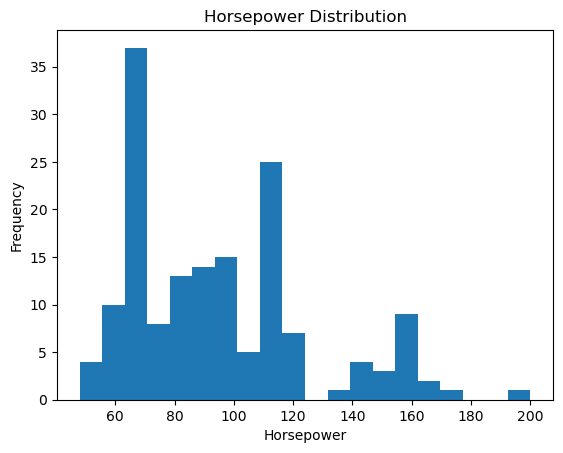

In [451]:
plt.hist(df['horsepower'], bins = 20)
plt.title("Horsepower Distribution")
plt.xlabel("Horsepower")
plt.ylabel("Frequency")

In [452]:
bins = np.linspace(min(df['horsepower']),max(df['horsepower']),4)
bins

array([ 48.        ,  98.66666667, 149.33333333, 200.        ])

In [453]:
group_names = ['Low', 'Medium', 'High']
df['Horsepower_Binned'] = pd.cut(df['horsepower'],bins , labels = group_names , include_lowest=True)
df[['horsepower','Horsepower_Binned']]

C:\Users\Syma\AppData\Local\Temp\ipykernel_24544\3227757790.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Horsepower_Binned'] = pd.cut(df['horsepower'],bins , labels = group_names , include_lowest=True)


,horsepower,Horsepower_Binned
3,102.0,Medium
4,115.0,Medium
6,110.0,Medium
8,140.0,Medium
10,101.0,Medium
...,...,...
200,114.0,Medium
201,160.0,High
202,134.0,Medium
203,106.0,Medium


In [454]:
df['Horsepower_Binned'].value_counts()

Horsepower_Binned
Low       96
Medium    47
High      16
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

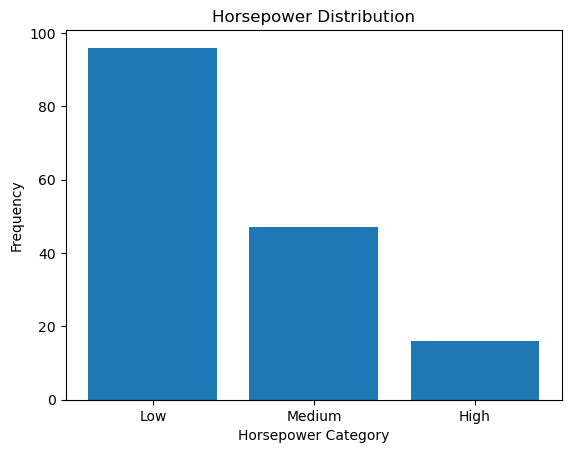

In [455]:
plt.bar(group_names ,df['Horsepower_Binned'].value_counts())
plt.title("Horsepower Distribution")
plt.xlabel("Horsepower Category")
plt.ylabel("Frequency")

## Indicator variable (or dummy variable)
We see the column "fuel-type" has two unique values, "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "fuel-type" into indicator variables.


In [456]:
dummy_variable_1 = pd.get_dummies(df['fuel-type']).astype(int)
dummy_variable_1

,diesel,gas
3,0,1
4,0,1
6,0,1
8,0,1
10,0,1
...,...,...
200,0,1
201,0,1
202,0,1
203,1,0


In [457]:
dummy_variable_1.rename(columns={'fuel-type-diesel':'diesel','fuel-type-gas':'gas'})
dummy_variable_1.head()

,diesel,gas
3,0,1
4,0,1
6,0,1
8,0,1
10,0,1


In [458]:
df = pd.concat([df,dummy_variable_1], axis=1)
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-km/l,highway-km/l,Horsepower_Binned,diesel,gas
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,102.0,5500.0,24,30,13950.0,10.204082,12.755102,Medium,0,1
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,115.0,5500.0,18,22,17450.0,7.653061,9.353741,Medium,0,1
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,110.0,5500.0,19,25,17710.0,8.078231,10.629252,Medium,0,1
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,140.0,5500.0,17,20,23875.0,7.227891,8.503401,Medium,0,1
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,101.0,5800.0,23,29,16430.0,9.778912,12.329932,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,114.0,5400.0,23,28,16845.0,9.778912,11.904762,Medium,0,1
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,160.0,5300.0,19,25,19045.0,8.078231,10.629252,High,0,1
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,134.0,5500.0,18,23,21485.0,7.653061,9.778912,Medium,0,1
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,106.0,4800.0,26,27,22470.0,11.054422,11.479592,Medium,1,0


In [459]:
df.drop('fuel-type', axis = 1)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-km/l,highway-km/l,Horsepower_Binned,diesel,gas
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.871668,...,102.0,5500.0,24,30,13950.0,10.204082,12.755102,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.871668,...,115.0,5500.0,18,22,17450.0,7.653061,9.353741,Medium,0,1
6,1,158,audi,std,four,sedan,fwd,front,105.8,0.951135,...,110.0,5500.0,19,25,17710.0,8.078231,10.629252,Medium,0,1
8,1,158,audi,turbo,four,sedan,fwd,front,105.8,0.951135,...,140.0,5500.0,17,20,23875.0,7.227891,8.503401,Medium,0,1
10,2,192,bmw,std,two,sedan,rwd,front,101.2,0.872655,...,101.0,5800.0,23,29,16430.0,9.778912,12.329932,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.931885,...,114.0,5400.0,23,28,16845.0,9.778912,11.904762,Medium,0,1
201,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.931885,...,160.0,5300.0,19,25,19045.0,8.078231,10.629252,High,0,1
202,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.931885,...,134.0,5500.0,18,23,21485.0,7.653061,9.778912,Medium,0,1
203,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.931885,...,106.0,4800.0,26,27,22470.0,11.054422,11.479592,Medium,1,0


Just Like above, created an indicator variable to the column of "aspiration": "std" to 0, while "turbo" to 1.

In [460]:
dummy_variable_2 = pd.get_dummies(df['aspiration']).astype(int)
dummy_variable_2

,std,turbo
3,1,0
4,1,0
6,1,0
8,0,1
10,1,0
...,...,...
200,1,0
201,0,1
202,1,0
203,0,1


In [461]:
dummy_variable_2.rename(columns = {'aspiration-turbo':'turbo','aspiration-std':'std'})
df = pd.concat([df, dummy_variable_2], axis = 1)
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,city-mpg,highway-mpg,price,city-km/l,highway-km/l,Horsepower_Binned,diesel,gas,std,turbo
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,24,30,13950.0,10.204082,12.755102,Medium,0,1,1,0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,18,22,17450.0,7.653061,9.353741,Medium,0,1,1,0
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,19,25,17710.0,8.078231,10.629252,Medium,0,1,1,0
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,17,20,23875.0,7.227891,8.503401,Medium,0,1,0,1
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,23,29,16430.0,9.778912,12.329932,Medium,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,23,28,16845.0,9.778912,11.904762,Medium,0,1,1,0
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,19,25,19045.0,8.078231,10.629252,High,0,1,0,1
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,18,23,21485.0,7.653061,9.778912,Medium,0,1,1,0
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,26,27,22470.0,11.054422,11.479592,Medium,1,0,0,1


---

## Exploratory Data Analysis (EDA)
### Visualizing Data Distributions


Text(0.5, 1.0, 'Dataframe Heatmap')

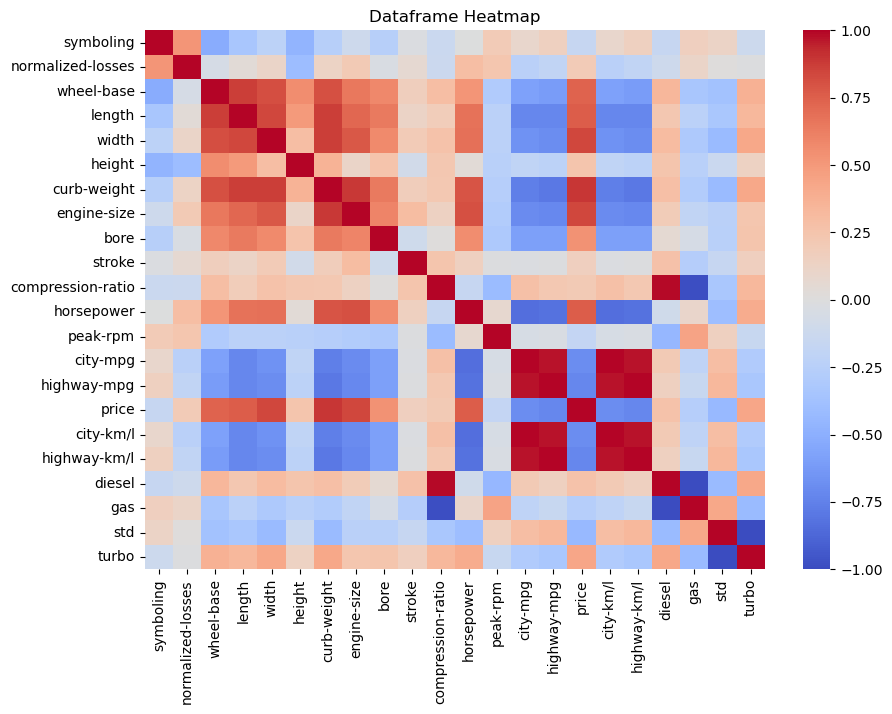

In [462]:
numeric_df = df.select_dtypes(['float','int'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize = (10,7))
sns.heatmap(correlation_matrix,cmap = 'coolwarm' ,center = 0)
plt.title("Dataframe Heatmap")

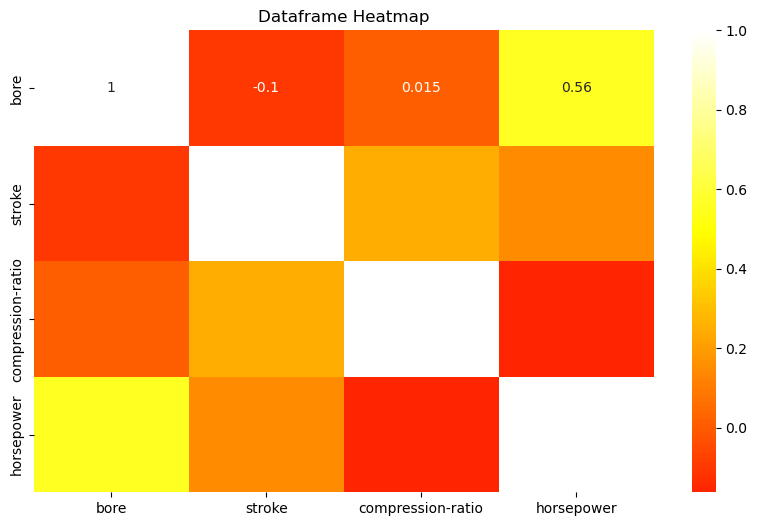

In [516]:
engine_config_values = pd.DataFrame(df[['bore','stroke' ,'compression-ratio','horsepower']]).corr()

plt.figure(figsize = (10,6))
sns.heatmap(engine_config_values,cmap = 'hot', annot = True, center = 0)
plt.title("Dataframe Heatmap")
plt.show()

(0.0, 39077.63289446117)

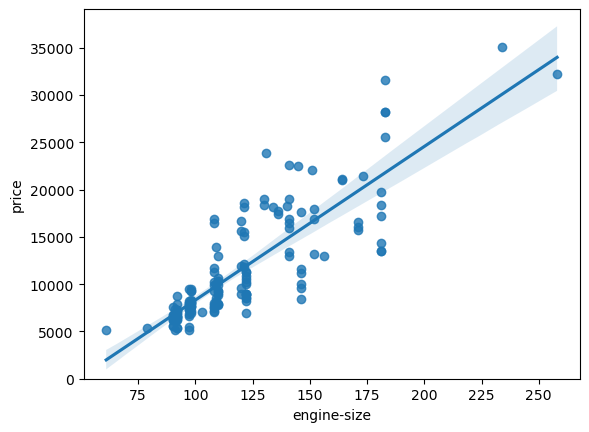

In [464]:
# Engine size as potential predictor variable of price
sns.regplot(x = 'engine-size', y = 'price', data = df)
plt.ylim(0)

As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.

In [465]:
df[['engine-size','price']].corr()

,engine-size,price
engine-size,1.000000,0.841496
price,0.841496,1.000000


We can examine the correlation between 'engine-size' and 'price' and see it's approximately 0.841

<Axes: xlabel='highway-km/l', ylabel='price'>

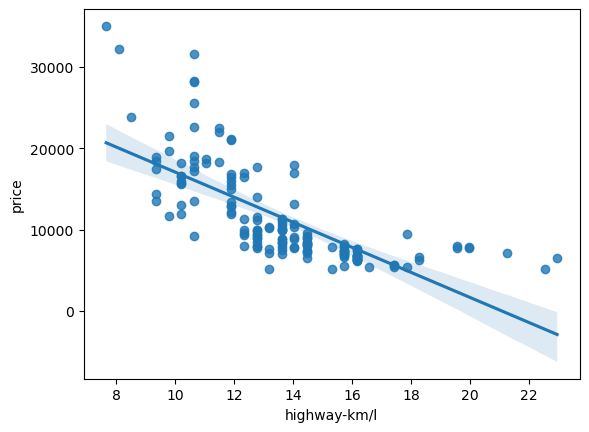

In [517]:
#Checking to see Highway km/l as a potential predictor variable of price 
sns.regplot(x="highway-km/l", y="price", data=df)

As the highway-km/l goes up, the price goes down: this indicates an inverse/negative relationship between these two variables. Highway km/l could potentially be a predictor of price.


In [467]:
df[['highway-km/l','price']].corr()

,highway-km/l,price
highway-km/l,1.00000,-0.72009
price,-0.72009,1.00000


We can examine the correlation between 'highway-km/l' and 'price' and see it's approximately -0.720

<Axes: xlabel='city-km/l', ylabel='price'>

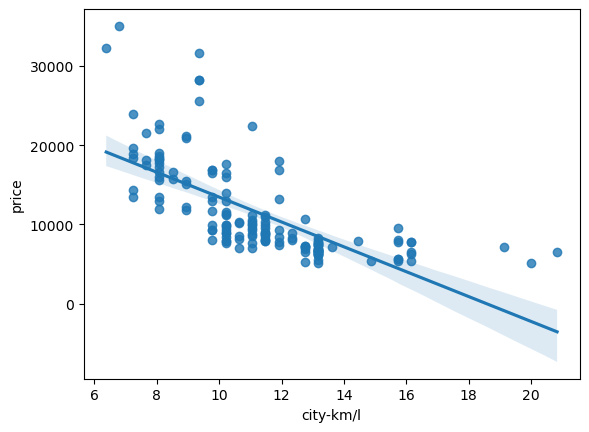

In [523]:
# Let's see if "City-km/l" as a predictor variable of "price".
sns.regplot(x="city-km/l", y="price", data=df)

As the city-km/l goes up, the price goes down: this indicates an inverse/negative relationship between these two variables. City-km/l could potentially be a predictor of price.


In [522]:
df[['city-km/l','price']].corr()

,city-km/l,price
city-km/l,1.000000,-0.692273
price,-0.692273,1.000000


We can examine the correlation between 'city-km/l' and 'price' and see it's approximately -0.692

In [524]:
df[['price','city-km/l','highway-km/l']].corr()

,price,city-km/l,highway-km/l
price,1.000000,-0.692273,-0.720090
city-km/l,-0.692273,1.000000,0.971999
highway-km/l,-0.720090,0.971999,1.000000


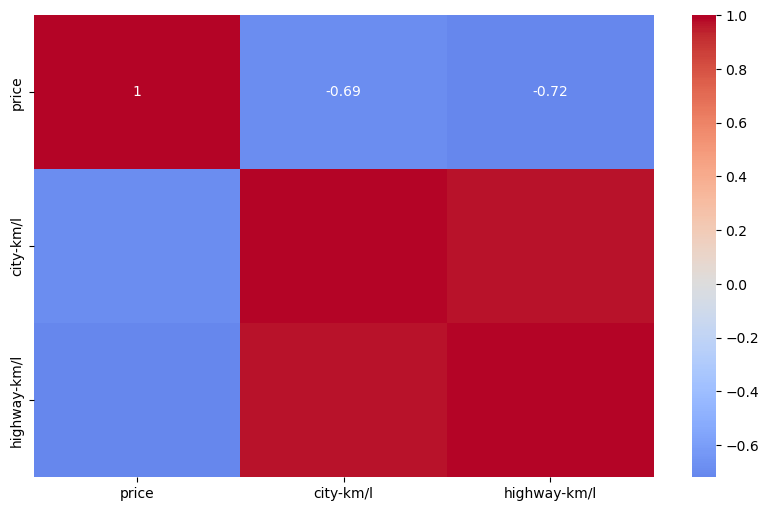

In [470]:
plt.figure(figsize = (10,6))
sns.heatmap(pd.DataFrame(df[['price','city-km/l','highway-km/l']]).corr(), annot = True, cmap = 'coolwarm', center = 0)
plt.show()

Based on the correlation matrix and heatmap, here’s an interpretation of the results:

1. Price and City Fuel Efficiency (city-km/l): The correlation coefficient is -0.692273, indicating a strong negative correlation. This suggests that as the price of a car increases, its city fuel efficiency tends to decrease.

2. Price and Highway Fuel Efficiency (highway-km/l): The correlation coefficient is -0.720090, indicating a strong negative correlation. This implies that more expensive cars generally have lower highway fuel efficiency.

3. City Fuel Efficiency (city-km/l) and Highway Fuel Efficiency (highway-km/l): The correlation coefficient is 0.971999, showing a very strong positive correlation. This means that cars that are efficient in city driving are also likely to be efficient on the highway.



<Axes: xlabel='peak-rpm', ylabel='price'>

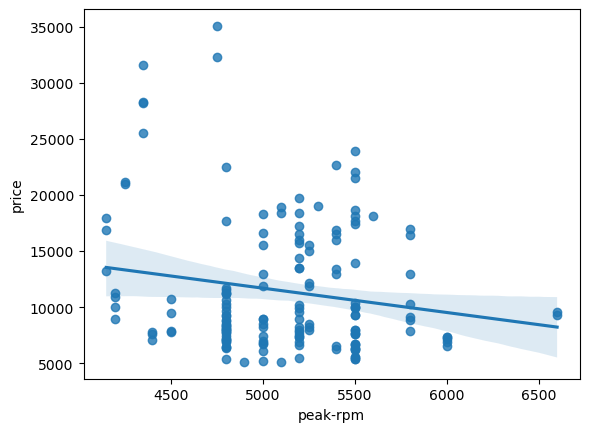

In [521]:
# Let's see if "Peak-rpm" as a predictor variable of "price".
sns.regplot(x="peak-rpm", y="price", data=df)

Peak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore it's it is not a reliable variable.

In [472]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.171916
price,-0.171916,1.000000


We can examine the correlation between 'peak-rpm' and 'price' and see it's approximately -0.101616

---

## Statistical Analysis

### **1. Is the mean price of cars with turbo aspiration significantly different from cars with standard aspiration?**

In [525]:
mean_price_aspiration = df.groupby('aspiration')['price'].mean().to_frame()
mean_price_aspiration


,price
aspiration,
std,10297.651515
turbo,17058.555556


In [478]:
# H0 = The mean price is equal
# H1 = The mean price is different.

turbo_prices = np.array(df['price'].where(df['aspiration'] == 'turbo').dropna())
standard_prices = np.array(df['price'].where(df['aspiration'] == 'std').dropna())

def two_z_test(sample1, sample2):
    mean1 = np.mean(sample1)
    mean2 = np.mean(sample2)
    std1 = np.std(sample1, ddof=1)  # ddof=1 for sample standard deviation
    std2 = np.std(sample2, ddof=1)  # ddof=1 for sample standard deviation
    n1 = len(sample1)
    n2 = len(sample2)
    z_stat = (mean1 - mean2) / np.sqrt((std1**2 / n1) + (std2**2 / n2))
    p_value = 2 * (1 - norm.cdf(np.abs(z_stat)))
    return z_stat, p_value

# Perform Z-test
z_stat, p_value = two_z_test(turbo_prices, standard_prices)
print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. The mean prices are significantly different.")
else:
    print("Fail to reject the null hypothesis. The mean prices are not significantly different.")


Z-statistic: 4.8792711288887265
P-value: 1.0647860497758899e-06
Reject the null hypothesis. The mean prices are significantly different.


(0.0, 36552.9)

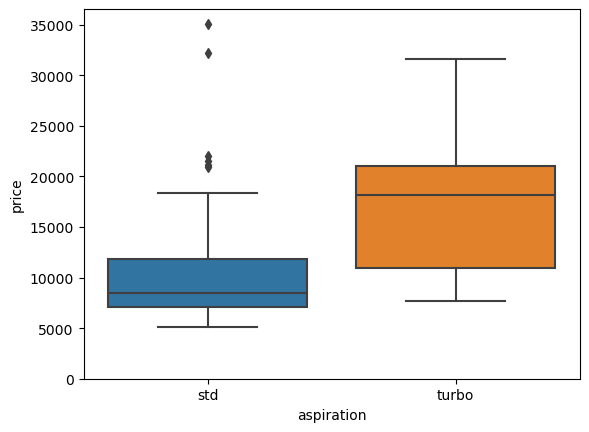

In [479]:
sns.boxplot(x='aspiration', y='price', data=df)
plt.ylim(0)

The box plot shows the distribution of car prices based on aspiration type (standard vs. turbo).

### Interpretation:

1. **Median Price**: 
   - The median price of cars with a standard aspiration (std) is lower compared to those with a turbo aspiration.
   - The median price of turbo cars is notably higher, indicating a significant difference in pricing.

2. **Interquartile Range (IQR)**: The IQR, which represents the middle 50% of the data, is wider for turbo cars compared to standard cars. This suggests that turbo cars have a greater variability in prices.
   
3. **Outliers**: There are several outliers in the standard aspiration category, with prices significantly higher than the rest of the data. These outliers are not present in the turbo category.

4. **Range**: Turbo cars show a wider range of prices overall, from the lower whisker to the upper whisker.

### Conclusion:
There is strong evidence to suggest that the mean prices of cars with standard aspiration are significantly different from those with turbo aspiration. Turbo cars tend to be priced higher on average compared to standard aspiration cars.

---

### **2. Is there a significant difference in the mean horsepower between cars with different fuel types (diesel vs. gas)?**

In [480]:
mean_horsepower_fuel = df.groupby('fuel-type')['horsepower'].mean().to_frame()
mean_horsepower_fuel

,horsepower
fuel-type,
diesel,86.333333
gas,96.826389


In [481]:
# H0 = The mean horsepower is equal
# H1 = The mean horsepower is different.

diesel_horsepower = np.array(df['horsepower'].where(df['fuel-type'] == 'diesel').dropna())
gas_horsepower = np.array(df['horsepower'].where(df['fuel-type'] == 'gas').dropna())

def two_sample_t_test(sample1, sample2):
    mean1 = np.mean(sample1)
    mean2 = np.mean(sample2)
    std1 = np.std(sample1, ddof=1)  # ddof=1 for sample standard deviation
    std2 = np.std(sample2, ddof=1)  # ddof=1 for sample standard deviation
    n1 = len(sample1)
    n2 = len(sample2)
    pooled_std = np.sqrt((std1**2 / n1) + (std2**2 / n2))
    t_stat = (mean1 - mean2) / pooled_std
    df = min(n1, n2) - 1  # degrees of freedom approximation
    p_value = 2 * (1 - t.cdf(np.abs(t_stat), df=df))
    return t_stat, p_value

# Perform T-test
t_stat, p_value = two_sample_t_test(diesel_horsepower, gas_horsepower)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in mean horsepower between cars with different fuel types.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in mean horsepower between cars with different fuel types.")


T-statistic: -1.3300979932493346
P-value: 0.2047490689927094
Fail to reject the null hypothesis. There is no significant difference in mean horsepower between cars with different fuel types.


(0.0, 207.6)

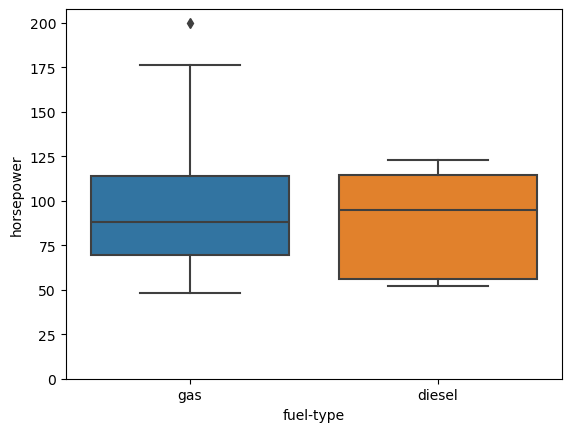

In [482]:
sns.boxplot(x='fuel-type', y='horsepower', data=df)
plt.ylim(0)

### Box Plot Interpretation

The box plot shows:
- The median horsepower for both gas and diesel cars, which are quite similar.
- The interquartile range (IQR) for both fuel types, showing the spread of the middle 50% of the data.
- Outliers are more prominent in the gas category, indicating higher variability in horsepower for gas cars.

**Conclusion:**

There is no significant difference in the mean horsepower between diesel and gas cars. The box plot visualization supports this finding as the distributions of horsepower for both fuel types overlap considerably, indicating that fuel type does not significantly affect the horsepower of the cars in this dataset. Overall, the visual and statistical evidence suggests that the fuel type does not have a significant impact on the horsepower of the cars.

---

### **3. Is the mean price of cars with rear-wheel drive (rwd) significantly higher than those with front-wheel drive (fwd)?**

In [483]:
mean_drive_price = df.groupby('drive-wheels')['price'].mean().to_frame()
mean_drive_price

,price
drive-wheels,
4wd,10241.000000
fwd,8811.038095
rwd,17669.217391


using annova

In [484]:
grouped_test = df[['drive-wheels','price']].groupby(['drive-wheels'])
grouped_test.head(2)

,drive-wheels,price
3,fwd,13950.0
4,4wd,17450.0
6,fwd,17710.0
10,rwd,16430.0
11,rwd,16925.0
140,4wd,7603.0


In [485]:
# Perform ANOVA tests
f_val, p_val = stats.f_oneway(
    grouped_test.get_group(('fwd',))['price'],
    grouped_test.get_group(('rwd',))['price'],
    grouped_test.get_group(('4wd',))['price']
)
print("ANOVA results for all groups: F =", f_val, ", P =", p_val)

f_val, p_val = stats.f_oneway(
    grouped_test.get_group(('fwd',))['price'],
    grouped_test.get_group(('rwd',))['price']
)
print("ANOVA results for fwd vs rwd: F =", f_val, ", P =", p_val)

f_val, p_val = stats.f_oneway(
    grouped_test.get_group(('4wd',))['price'],
    grouped_test.get_group(('rwd',))['price']
)
print("ANOVA results for 4wd vs rwd: F =", f_val, ", P =", p_val)

f_val, p_val = stats.f_oneway(
    grouped_test.get_group(('4wd',))['price'],
    grouped_test.get_group(('fwd',))['price']
)
print("ANOVA results for 4wd vs fwd: F =", f_val, ", P =", p_val)


ANOVA results for all groups: F = 66.99073391404414 , P = 9.973317664143404e-22
ANOVA results for fwd vs rwd: F = 130.71816724235973 , P = 3.965316250053441e-22
ANOVA results for 4wd vs rwd: F = 10.277906326735897 , P = 0.0023034687518854306
ANOVA results for 4wd vs fwd: F = 1.5202558364479262 , P = 0.22018566322213404


(0.0, 36552.9)

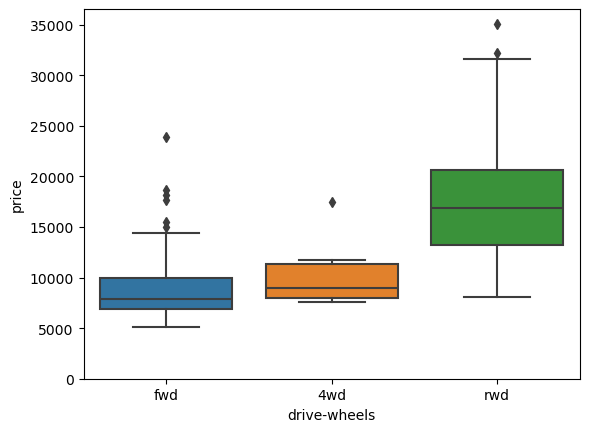

In [486]:
sns.boxplot(x='drive-wheels', y='price', data=df)
plt.ylim(0)

Here's an interpretation of the results:

**ANOVA Results:**

* **All groups ("fwd", "rwd", "4wd"):** F = 66.99, P = 9.97e-22.  
    * This highly significant result (p-value << 0.05) indicates that there is a strong evidence to reject the null hypothesis that the mean prices of all three groups are equal. This suggests at least one of the groups has a significantly different mean price.
* **"fwd" vs "rwd":** F = 130.72, P = 3.97e-22.
    *  This is also a highly significant result. It means the mean price of cars with "fwd" drive-wheels is significantly different from the mean price of cars with "rwd" drive-wheels. 
* **"4wd" vs "rwd":** F = 10.28, P = 0.0023.
    * This is a significant result. It suggests the mean price of cars with "4wd" drive-wheels is significantly different from the mean price of cars with "rwd" drive-wheels.
* **"4wd" vs "fwd":** F = 1.52, P = 0.22.
    * This result is not statistically significant (p-value > 0.05). This means there is not enough evidence to conclude that the mean price of cars with "4wd" drive-wheels is different from the mean price of cars with "fwd" drive-wheels.

**Conclusion:**

Based on the ANOVA results, we can conclude the following:

* There is a statistically significant difference in mean prices between cars with different drive-wheel configurations.
* The mean price of cars with "rwd" is significantly higher than both "fwd" and "4wd" cars.
* There is no significant difference in mean price between "fwd" and "4wd" cars.

**Visual Inspection:**

Looking at the boxplot, the "rwd" group has a higher median price and a wider range compared to the other groups, which aligns with the ANOVA findings. The "fwd" and "4wd" groups appear more similar in their distribution, also consistent with the non-significant result of the "4wd" vs "fwd" comparison.

---

### **4. Which features are most significantly correlated with the car price?**

In [487]:
df_numeric = df.select_dtypes(['int',float])

pearson_p_val_table = pd.DataFrame(columns=['Column','Pearson_Coefficient','P_Value'])

for columns in df_numeric:
    pearson_coef, p_value = stats.pearsonr(df_numeric[columns], df['price'])
    temp_df = pd.DataFrame({'Column':[columns], 'Pearson_Coefficient':[pearson_coef], 'P_Value':[p_value]})
    pearson_p_val_table = pd.concat([pearson_p_val_table, temp_df], ignore_index = True)

pearson_p_val_table['P_Value'] = pearson_p_val_table['P_Value'].apply(lambda x: "{:.3f}".format(x))
pearson_p_val_table['Pearson_Coefficient'] = pearson_p_val_table['Pearson_Coefficient'].apply(lambda x: "{:.3f}".format(x))

pearson_p_val_table['P_Value'] = pd.to_numeric(pearson_p_val_table['P_Value'])
pearson_p_val_table['Pearson_Coefficient'] = pd.to_numeric(pearson_p_val_table['Pearson_Coefficient'])

pearson_p_val_table.sort_values(by = 'P_Value', ascending = False)

C:\Users\Syma\AppData\Local\Temp\ipykernel_24544\1340304374.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pearson_p_val_table = pd.concat([pearson_p_val_table, temp_df], ignore_index = True)


,Column,Pearson_Coefficient,P_Value
9,stroke,0.161,0.043
0,symboling,-0.163,0.040
12,peak-rpm,-0.172,0.030
1,normalized-losses,0.203,0.010
10,compression-ratio,0.209,0.008
5,height,0.245,0.002
19,gas,-0.261,0.001
18,diesel,0.261,0.001
14,highway-mpg,-0.720,0.000
20,std,-0.433,0.000


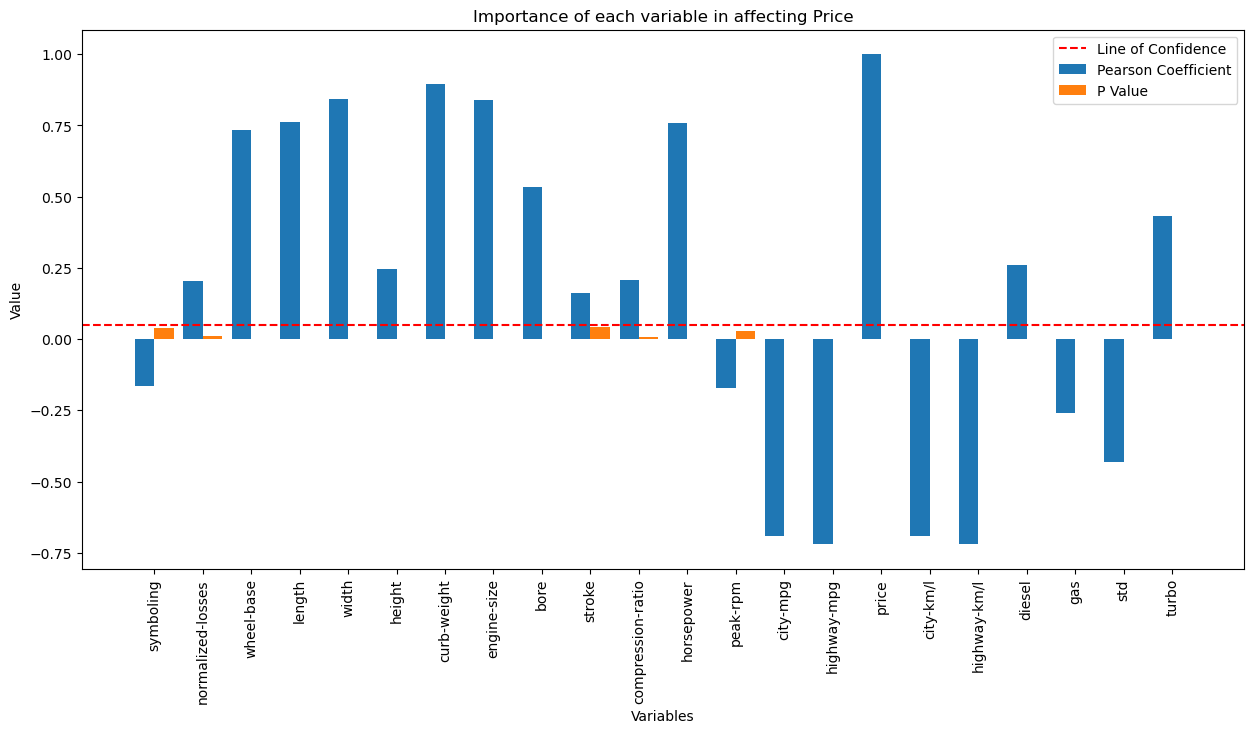

In [488]:
fig, ax = plt.subplots(figsize=(15, 7))

X_axis = np.arange(len(pearson_p_val_table['Column']))

bar_width = 0.4

plt.bar(X_axis - bar_width/2, pearson_p_val_table['Pearson_Coefficient'], width=bar_width, label='Pearson Coefficient')
plt.bar(X_axis + bar_width/2, pearson_p_val_table['P_Value'], width=bar_width, label='P Value')
plt.axhline(y=0.05, color='r', linestyle='--', label='Line of Confidence')

plt.xticks(X_axis, pearson_p_val_table['Column'], rotation=90)
plt.xlabel("Variables") 
plt.ylabel("Value") 
plt.title("Importance of each variable in affecting Price") 
plt.legend() 
plt.show()

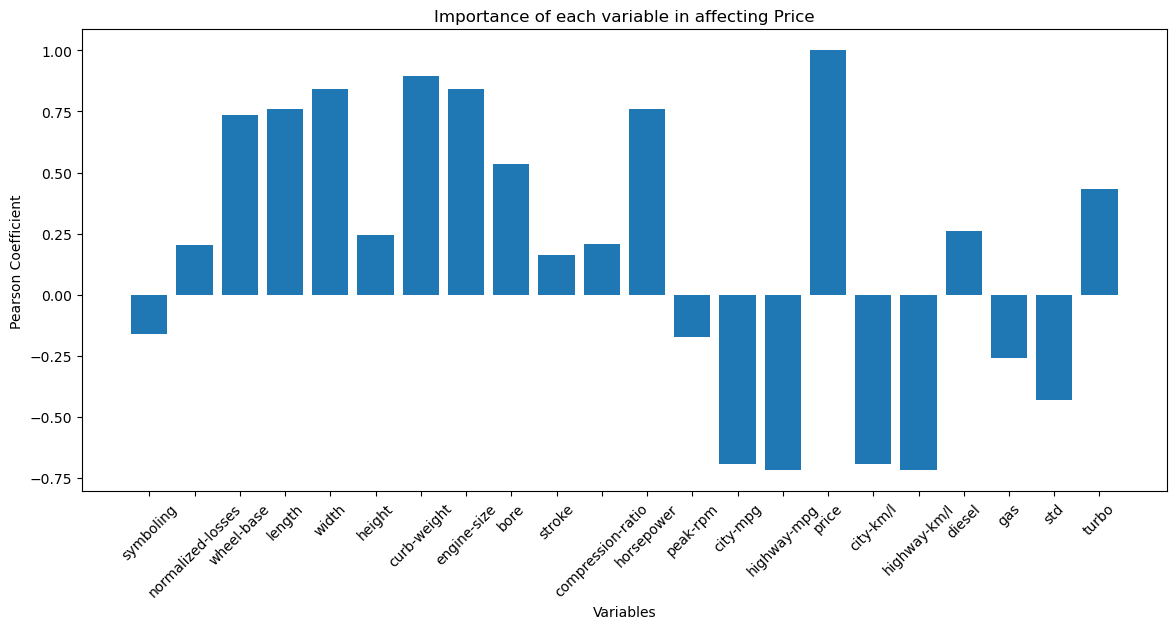

In [526]:
pearson_p_val_table_filtered = pearson_p_val_table[pearson_p_val_table['P_Value'] <= 0.05]

plt.figure(figsize = (14,6))
plt.bar(pearson_p_val_table_filtered['Column'], pearson_p_val_table_filtered['Pearson_Coefficient'])
plt.xticks(rotation = 45)
plt.xlabel("Variables") 
plt.ylabel("Pearson Coefficient") 
plt.title("Importance of each variable in affecting Price") 
plt.show()

**Insights from the Table:**

* **Strongest Positive Correlations:**
    * **`engine-size` (0.841)**:  As engine size increases, price tends to increase.
    * **`curb-weight` (0.894)**:  As curb weight increases, price tends to increase.
    * **`width` (0.843)**: As width increases, price tends to increase.
* **Strongest Negative Correlations:**
    * **`highway-mpg` (and `highway-km/l`) (-0.720)**: As highway fuel efficiency increases, price tends to decrease.
* **Other Notable Correlations:**
    * **`horsepower` (0.760)**: There's a positive correlation between horsepower and price.
    * **`length` (0.761)**: There's a positive correlation between length and price.
    * **`wheel-base` (0.734)**: There's a positive correlation between wheelbase and price.


**Key Findings:**

This analysis highlights some key factors that are likely to influence car prices:

* **Larger Engines and Heavier Cars:**  Cars with larger engines and heavier curb weights tend to have higher prices.
* **Fuel Efficiency:**  Higher fuel efficiency (measured by highway mpg) tends to be associated with lower prices. 
* **Size and Dimensions:** Factors like length, width, and wheelbase are positively correlated with price. 

This information suggests that features like engine power, vehicle size, and fuel economy are significant factors that buyers consider when determining the value of a car. 

---

### **5. Is there a significant difference in the mean price of cars across different body styles?**

**Null Hypothesis (𝐻0):** The mean prices of cars are the same across different body styles.

**Alternative Hypothesis (𝐻1):** At least one body style has a different mean price.

In [490]:
bodystyle_annova = df[['body-style','price']]
bodystyle_annova

,body-style,price
3,sedan,13950.0
4,sedan,17450.0
6,sedan,17710.0
8,sedan,23875.0
10,sedan,16430.0
...,...,...
200,sedan,16845.0
201,sedan,19045.0
202,sedan,21485.0
203,sedan,22470.0


In [491]:
bodystyle_annova.groupby('body-style').count()

,price
body-style,
convertible,2
hardtop,5
hatchback,56
sedan,79
wagon,17


In [492]:
bodystyle_annova_1 = bodystyle_annova.groupby('body-style')['price'].mean().to_frame()
bodystyle_annova_1

,price
body-style,
convertible,26362.500000
hardtop,13142.400000
hatchback,9220.160714
sedan,12558.620253
wagon,11351.411765


(0.0, 36552.9)

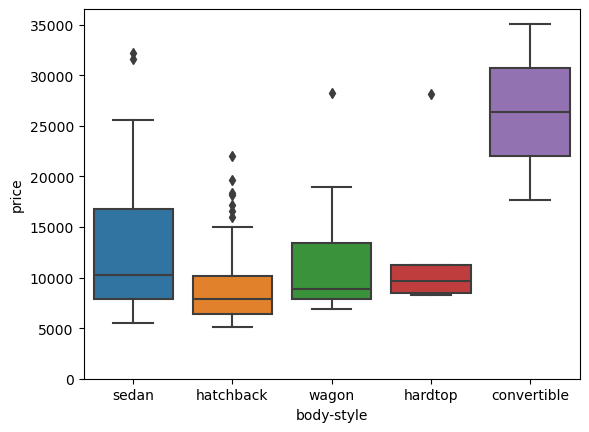

In [493]:
sns.boxplot(x='body-style', y='price', data=df)
plt.ylim(0)

In [494]:
# Statistical check with Shapiro-Wilk test
for group in bodystyle_annova['body-style'].unique():
    stat, p = shapiro(bodystyle_annova[bodystyle_annova['body-style'] == group]['price'])
    print(f'Normality test for {group}: Statistics={stat}, p-value={p}')

Normality test for sedan: Statistics=0.8666577575008012, p-value=6.994789761930285e-07
Normality test for hatchback: Statistics=0.821706090788294, p-value=9.786574245113339e-07
Normality test for wagon: Statistics=0.7555778195176321, p-value=0.0005308224205300125
Normality test for hardtop: Statistics=0.6715639249827106, p-value=0.004713452355698357


ValueError: Data must be at least length 3.

In [495]:
groups = [group['price'].values for name, group in bodystyle_annova.groupby('body-style')]
stat, p = levene(*groups)
print(f'Levene’s test for homogeneity of variances: Statistics={stat}, p-value={p}')


Levene’s test for homogeneity of variances: Statistics=2.087256512437484, p-value=0.08510137957337455


In [496]:
from scipy.stats import f_oneway

# Extracting the prices for each group
convertible_prices = bodystyle_annova[bodystyle_annova['body-style'] == 'convertible']['price']
hardtop_prices = bodystyle_annova[bodystyle_annova['body-style'] == 'hardtop']['price']
hatchback_prices = bodystyle_annova[bodystyle_annova['body-style'] == 'hatchback']['price']
sedan_prices = bodystyle_annova[bodystyle_annova['body-style'] == 'sedan']['price']
wagon_prices = bodystyle_annova[bodystyle_annova['body-style'] == 'wagon']['price']

# Perform ANOVA
f_val, p_val = f_oneway(convertible_prices, hardtop_prices, hatchback_prices, sedan_prices, wagon_prices)
print(f"ANOVA results: F={f_val}, P={p_val}")


ANOVA results: F=6.950543250527861, P=3.6002841094832276e-05


In [497]:
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis. There is a significant difference in the mean price of cars across different body styles.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the mean price of cars across different body styles.")


Reject the null hypothesis. There is a significant difference in the mean price of cars across different body styles.


In [498]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Conduct Tukey's HSD test
prices = bodystyle_annova['price']
body_styles = bodystyle_annova['body-style']
tukey_result = pairwise_tukeyhsd(prices, body_styles, alpha=0.05)
print(tukey_result)


         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
   group1     group2    meandiff  p-adj     lower      upper    reject
----------------------------------------------------------------------
convertible   hardtop    -13220.1 0.0358 -25875.1445  -565.0555   True
convertible hatchback -17142.3393 0.0002 -28027.1189 -6257.5596   True
convertible     sedan -13803.8797 0.0051 -24633.8839 -2973.8756   True
convertible     wagon -15011.0882 0.0031 -26318.2081 -3703.9683   True
    hardtop hatchback  -3922.2393 0.5424 -10982.1719  3137.6934  False
    hardtop     sedan   -583.7797 0.9994  -7558.9651  6391.4056  False
    hardtop     wagon  -1790.9882 0.9678  -9486.1284  5904.1519  False
  hatchback     sedan   3338.4595 0.0057    696.2091    5980.71   True
  hatchback     wagon   2131.2511 0.6257  -2057.2402  6319.7423  False
      sedan     wagon  -1207.2085 0.9229  -5251.2189  2836.8019  False
----------------------------------------------------------------------


**Boxplot Interpretation:**

- **Key Observations:**
    - **Convertible:** This body style has the highest median price and a wider range overall. It also has several outliers, suggesting some very expensive convertibles.
    - **Sedan:** Sedans have a relatively lower median price and a smaller range compared to convertibles. 
    - **Hatchback, Wagon, Hardtop:** These body styles have lower median prices than convertibles and sedans, and their ranges are similar. 

**Normality Tests:**

- **Shapiro-Wilk Test:** The p-values for all body styles are less than 0.05, indicating that the price data within each group is not normally distributed. This suggests that parametric tests like ANOVA might not be entirely appropriate, but the results can still be informative.

**Homogeneity of Variances:**

- **Levene's Test:** The p-value (0.085) is slightly above the typical significance level of 0.05. This suggests that there might be some differences in variance, but not enough to strongly reject the assumption of equal variances. 

**ANOVA Results:** The ANOVA F-statistic is 6.95, and the p-value is 3.6e-05 (highly significant). Since the p-value is less than 0.05, we reject the null hypothesis.  This means there is strong evidence to suggest that the mean price of cars is significantly different for at least one of the body styles.

**Tukey HSD Post-Hoc Tests:**

- **Results:**
    - **Convertible vs Hardtop:**  The mean price of convertibles is significantly higher than hardtops (p-value = 0.0358). 
    - **Convertible vs Hatchback:** The mean price of convertibles is significantly higher than hatchbacks (p-value = 0.0002).
    - **Convertible vs Sedan:** The mean price of convertibles is significantly higher than sedans (p-value = 0.0051). 
    - **Convertible vs Wagon:** The mean price of convertibles is significantly higher than wagons (p-value = 0.0031).

**Overall Interpretation:**

The analysis confirms that there is a significant difference in the mean price of cars across different body styles. Convertibles are consistently more expensive than all other body styles. The differences in mean price between other body style pairs (e.g., hatchback vs. sedan) are not as consistently significant.

---

### **6. What is the correlation of Drive-Wheels and Bodystyle on Price?**

In [499]:
df_group_one = df[['drive-wheels','body-style','price']]
df_group_one

,drive-wheels,body-style,price
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
6,fwd,sedan,17710.0
8,fwd,sedan,23875.0
10,rwd,sedan,16430.0
...,...,...,...
200,rwd,sedan,16845.0
201,rwd,sedan,19045.0
202,rwd,sedan,21485.0
203,rwd,sedan,22470.0


In [500]:
df_group_one = df_group_one.groupby(['drive-wheels'],as_index = False)['price'].mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,8811.038095
2,rwd,17669.217391


In [501]:
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test_1 = df_gptest.groupby(['drive-wheels','body-style'],as_index = False).mean()
grouped_test_1 = grouped_test_1.sort_values(by=['drive-wheels', 'price'], ascending=[True, False])
grouped_test_1

,drive-wheels,body-style,price
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
0,4wd,hatchback,7603.000000
5,fwd,sedan,9558.120000
6,fwd,wagon,8829.222222
3,fwd,hardtop,8249.000000
4,fwd,hatchback,7989.800000
7,rwd,convertible,26362.500000
11,rwd,wagon,19282.000000
10,rwd,sedan,18318.576923


In [502]:
grouped_test_1_1 = df_gptest.groupby(['drive-wheels','body-style']).mean()
grouped_test_1_1 = grouped_test_1.sort_values(by = ['price'], ascending=[False])
grouped_test_1_1

,drive-wheels,body-style,price
7,rwd,convertible,26362.500000
11,rwd,wagon,19282.000000
10,rwd,sedan,18318.576923
9,rwd,hatchback,14918.500000
8,rwd,hardtop,14365.750000
1,4wd,sedan,12647.333333
5,fwd,sedan,9558.120000
2,4wd,wagon,9095.750000
6,fwd,wagon,8829.222222
3,fwd,hardtop,8249.000000


In [503]:
grouped_pivot = grouped_test_1.pivot(index = 'drive-wheels', columns = 'body-style')
grouped_pivot = grouped_pivot.fillna(0)
grouped_pivot

price                                                
body-style   convertible   hardtop hatchback         sedan         wagon
drive-wheels                                                            
4wd                  0.0      0.00    7603.0  12647.333333   9095.750000
fwd                  0.0   8249.00    7989.8   9558.120000   8829.222222
rwd              26362.5  14365.75   14918.5  18318.576923  19282.000000

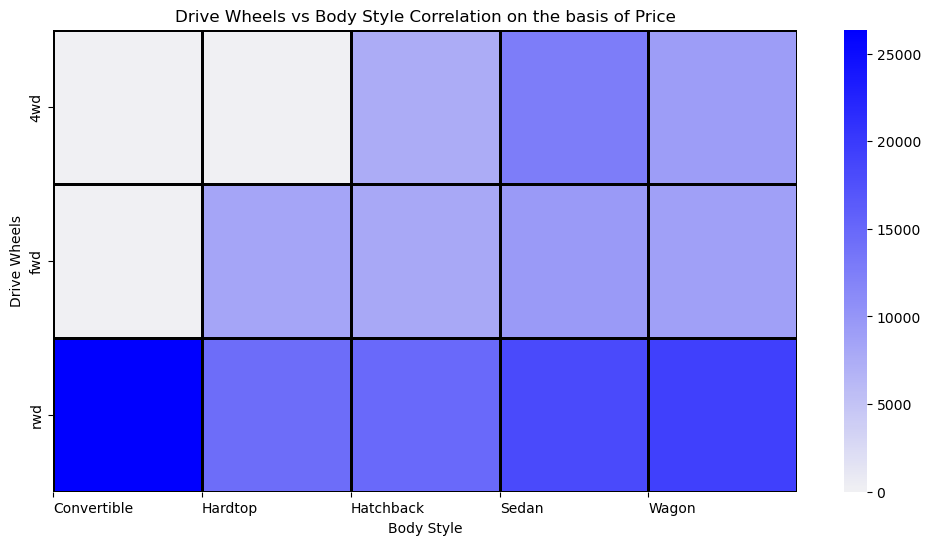

In [504]:
cmap = sns.light_palette("blue", as_cmap=True)

plt.figure(figsize = (12,6))
sns.heatmap(grouped_pivot, cmap = cmap, linecolor = 'Black', linewidths = 1)

x_labels = ['Convertible','Hardtop','Hatchback','Sedan','Wagon']
plt.xticks(ticks = range(len(x_labels)), labels = x_labels, ha='left')

plt.title("Drive Wheels vs Body Style Correlation on the basis of Price")
plt.xlabel('Body Style')
plt.ylabel('Drive Wheels')
plt.show()

In [505]:
df_gptest2 = df[['body-style','price']]
grouped_test_2 = df_gptest2.groupby(['body-style'],as_index = False).mean().sort_values(by = 'price', ascending = False)
grouped_test_2

,body-style,price
0,convertible,26362.500000
1,hardtop,13142.400000
3,sedan,12558.620253
4,wagon,11351.411765
2,hatchback,9220.160714


Here's a detailed interpretation of the results:

**Pivot Table:**
- **Key Observations:**
    - **Convertibles:** Are only found with rear-wheel drive (rwd) and have the highest average price.
    - **Rear-Wheel Drive (rwd):** Consistently has the highest average price across most body styles, indicating that cars with rear-wheel drive are generally more expensive.
    - **Front-Wheel Drive (fwd):**  Has lower average prices across all body styles compared to rear-wheel drive.
    - **Four-Wheel Drive (4wd):** Has a mixed range of average prices, suggesting that it's not as consistently linked to a specific price range as the other drive-wheel types.

**Heatmap:**
- **Key Observations:**
    - **Convertibles:** The highest price cell is for the combination of rear-wheel drive (rwd) and convertibles, confirming the trend from the pivot table.
    - **Rear-Wheel Drive:**  The darkest shades of blue are concentrated in the row for rear-wheel drive, highlighting that this drive type tends to be associated with higher prices.
    - **Other Body Styles:**  The colors for other body styles with rear-wheel drive are also generally darker than the corresponding cells for front-wheel and four-wheel drive, supporting the notion that rear-wheel drive cars tend to be more expensive across the board.

**Average Price by Body Style:**
- **Key Observation:**  This table confirms that convertibles have the highest average price overall, followed by hardtops, sedans, wagons, and hatchbacks. 

**Summary of Findings:**

My analysis suggests a strong relationship between drive-wheel configuration and body style in determining car prices:

- **Rear-Wheel Drive (rwd):**  Is significantly associated with higher average prices across a range of body styles.  
- **Convertibles:**  Are generally more expensive than other body styles, regardless of drive-wheel configuration.
- **Front-Wheel Drive (fwd):**  Is more commonly found in less expensive cars.
- **Four-Wheel Drive (4wd):**  Has a more mixed relationship with price, likely because this drive type is associated with different types of vehicles.

---

### 7. What is the combined effect of city fuel efficiency and highway fuel efficiency on the car price?

**Null Hypothesis (H0):** There is no linear relationship between car price and the predictors 

**Alternative Hypothesis (H1):** At least one of the predictors is linearly related to the car price


In [506]:
# Select relevant columns
mileage_effect = df[['price', 'city-mpg', 'highway-mpg']]
mileage_effect

,price,city-mpg,highway-mpg
3,13950.0,24,30
4,17450.0,18,22
6,17710.0,19,25
8,23875.0,17,20
10,16430.0,23,29
...,...,...,...
200,16845.0,23,28
201,19045.0,19,25
202,21485.0,18,23
203,22470.0,26,27


In [507]:
# Check for missing values
print(data.isnull().sum())

price          0
city-mpg       0
highway-mpg    0
dtype: int64


c:\Users\Syma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Syma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Syma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


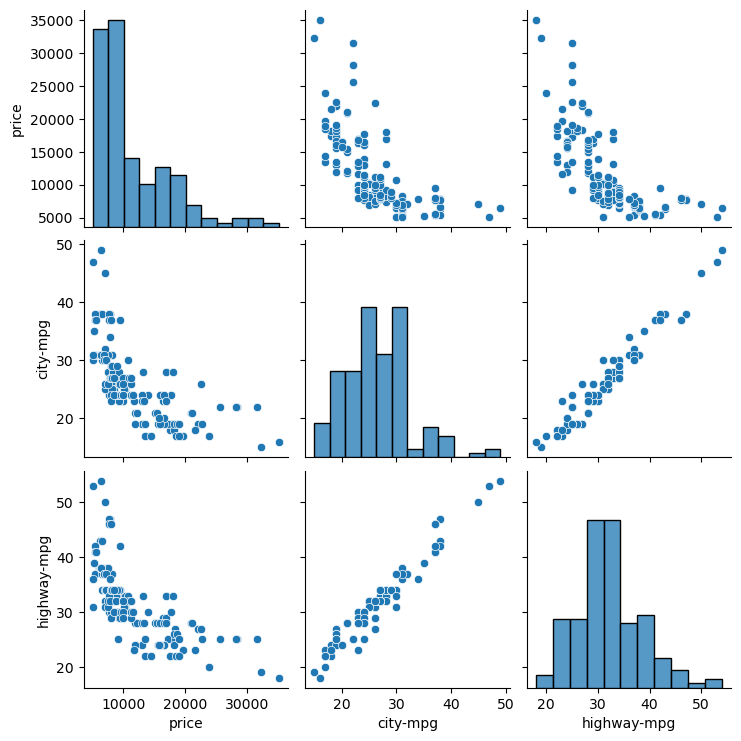

In [508]:
sns.pairplot(mileage_effect)
plt.show()

In [509]:
import statsmodels.api as sm

# Define the independent variables (add a constant for the intercept)
X = data[['city-mpg', 'highway-mpg']]
X = sm.add_constant(X)

# Define the dependent variable
y = data['price']

# Fit the model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     84.36
Date:                Sun, 09 Jun 2024   Prob (F-statistic):           1.46e-25
Time:                        14:00:39   Log-Likelihood:                -1546.8
No. Observations:                 159   AIC:                             3100.
Df Residuals:                     156   BIC:                             3109.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.286e+04   1780.573     18.453      

### Interpretation of OLS Regression Results

#### Key Metrics

1. **R-squared (R²): 0.520**
   - **Interpretation**: About 52.0% of the variability in car prices is explained by the model, which includes city and highway fuel efficiency as predictors.

2. **Adjusted R-squared: 0.513**
   - **Interpretation**: Adjusted for the number of predictors in the model, about 51.3% of the variability in car prices is explained by the predictors.

3. **F-statistic: 84.36, Prob (F-statistic): 1.46e-25**
   - **Interpretation**: The overall model is statistically significant (p-value < 0.05), indicating that at least one of the predictors is significantly related to car price.

4. **Coefficients:**
   - **const (Intercept): 32860**
     - **Interpretation**: The expected mean price of a car when both city-mpg and highway-mpg are zero is approximately $32,860. However, this is not a realistic scenario as no car has zero mpg.
   - **city-mpg: 133.6220**
     - **Interpretation**: Holding highway-mpg constant, for each additional mile per gallon in city fuel efficiency, the car price increases by approximately $133.62. However, the p-value (0.558) indicates that this relationship is not statistically significant.
   - **highway-mpg: -777.8818**
     - **Interpretation**: Holding city-mpg constant, for each additional mile per gallon in highway fuel efficiency, the car price decreases by approximately $777.88. This relationship is statistically significant (p-value < 0.05).

#### Statistical Significance

- **city-mpg (P>|t| = 0.558)**
  - **Conclusion**: The p-value is greater than 0.05, so city-mpg is not a statistically significant predictor of car price in this model.
- **highway-mpg (P>|t| = 0.000)**
  - **Conclusion**: The p-value is less than 0.05, so highway-mpg is a statistically significant predictor of car price.

### Model Assumptions

- **Normality (Omnibus test, Jarque-Bera test):**
  - **Omnibus: 43.301, Prob(Omnibus): 0.000**
  - **Jarque-Bera (JB): 74.451, Prob(JB): 6.81e-17**
  - **Conclusion**: These tests indicate that the residuals are not normally distributed, which could affect the reliability of the confidence intervals and hypothesis tests.

- **Homoscedasticity and Independence (Durbin-Watson: 1.089):**
  - **Durbin-Watson statistic near 2 indicates residuals are uncorrelated. A value of 1.089 suggests positive correlation in residuals.**


---

